## Project
#### Hi, I'm submitting my Jupyter Notebook work as a pdf with all the requirements as mentioned in the project rubric.
#### I'm using Python to do the calculations and make the graphs (I've only just started to learn Python & Data Analysis and this is good practise).
#####  

In [1]:
# learning to calculate moving averages

import pandas as pd

df = pd.read_csv("moving-average-exercise.csv")

In [2]:
df.head()

,Date,Sales
0,1/1/2009,"7,855"
1,1/2/2009,"12,329"
2,1/3/2009,"11,617"
3,1/4/2009,"7,684"
4,1/5/2009,"8,448"


In [3]:
df.Date = pd.to_datetime(df.Date, format=('%m/%d/%Y'))
df.Sales = df.Sales.str.replace(',','')
df.Sales = pd.to_numeric(df.Sales, errors='coerce')

In [4]:
df.head()

,Date,Sales
0,2009-01-01,7855
1,2009-01-02,12329
2,2009-01-03,11617
3,2009-01-04,7684
4,2009-01-05,8448


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 2 columns):
Date     90 non-null datetime64[ns]
Sales    90 non-null int64
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.5 KB


In [6]:
df['Moving_Avg'] = df.iloc[:,1].rolling(window=7).mean()

In [7]:
df.head(14)

,Date,Sales,Moving_Avg
0,2009-01-01,7855,NaN
1,2009-01-02,12329,NaN
2,2009-01-03,11617,NaN
3,2009-01-04,7684,NaN
4,2009-01-05,8448,NaN
5,2009-01-06,8022,NaN
6,2009-01-07,8410,9195.000000
7,2009-01-08,7850,9194.285714
8,2009-01-09,12399,9204.285714
9,2009-01-10,11919,9247.428571


In [8]:
df['Moving_Avg_14'] = df.iloc[:,1].rolling(window=14).mean()

In [9]:
df.loc[df.Date == '3/19/2009']

,Date,Sales,Moving_Avg,Moving_Avg_14
77,2009-03-19,8497,9938.428571,9981.071429


#####  

##### (project on temperature data starts here)

### SQL code for extracting data
#### select * from global_data;
#### select * from city_list; (just to see the list of cities)
#### select * from city_data where city = 'Helsinki';
#### select * from city_data where city = 'Melbourne';
#### select * from city_data where city = 'Tianjin';

#####  

### EDA - Temperature Data

In [10]:
# importing data from downloaded csv files

city = pd.read_csv('results_helsinki.csv')
globe = pd.read_csv('results_global.csv')

In [11]:
# renaming column name

city = city.rename(columns = {'avg_temp':'helsinki'})
globe = globe.rename(columns = {'avg_temp':'globe'})

In [12]:
city.head() # checking the data

,year,city,country,helsinki
0,1743,Helsinki,Finland,1.55
1,1744,Helsinki,Finland,6.32
2,1745,Helsinki,Finland,-5.95
3,1746,Helsinki,Finland,NaN
4,1747,Helsinki,Finland,NaN


In [13]:
city = city.drop(['city','country'],axis=1) # dropping columns 'City' and 'Country'

In [14]:
globe.head() # just checing the data

,year,globe
0,1750,8.72
1,1751,7.98
2,1752,5.78
3,1753,8.39
4,1754,8.47


In [15]:
city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271 entries, 0 to 270
Data columns (total 2 columns):
year        271 non-null int64
helsinki    267 non-null float64
dtypes: float64(1), int64(1)
memory usage: 4.4 KB


In [16]:
city = city.dropna(subset=['helsinki']) # dropping null values

In [17]:
city.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 267 entries, 0 to 270
Data columns (total 2 columns):
year        267 non-null int64
helsinki    267 non-null float64
dtypes: float64(1), int64(1)
memory usage: 6.3 KB


In [18]:
globe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 2 columns):
year     266 non-null int64
globe    266 non-null float64
dtypes: float64(1), int64(1)
memory usage: 4.3 KB


In [19]:
# wanted both datasets to be for the same time period, even though it was not required for plotting a graph

city = city.loc[city.year >= 1750]
globe = globe.loc[globe.year <= 2013]

In [20]:
# setting index as the year, now the same for both datasets

city = city.set_index('year')
globe = globe.set_index('year')

In [21]:
# making one dataset with both global and Helsinki average temperatures

globe = globe.join(city)

In [22]:
globe.head() # checking the data

,globe,helsinki
year,,
1750,8.72,5.14
1751,7.98,4.68
1752,5.78,-0.29
1753,8.39,4.14
1754,8.47,4.15


In [23]:
# calculating the moving averages for both datasets (global and Helsinki) and saving it to the dataframe

globe['MA_globe'] = globe.globe.rolling(window=5).mean()
globe['MA_helsinki'] = globe.helsinki.rolling(window=5).mean()

In [24]:
globe.head(15) # checking the data

,globe,helsinki,MA_globe,MA_helsinki
year,,,,
1750,8.72,5.14,NaN,NaN
1751,7.98,4.68,NaN,NaN
1752,5.78,-0.29,NaN,NaN
1753,8.39,4.14,NaN,NaN
1754,8.47,4.15,7.868,3.564
1755,8.36,4.05,7.796,3.346
1756,8.85,4.47,7.970,3.304
1757,9.02,4.75,8.618,4.312
1758,6.74,2.66,8.288,4.016


In [25]:
# libraries for plotting graphs

%matplotlib inline

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

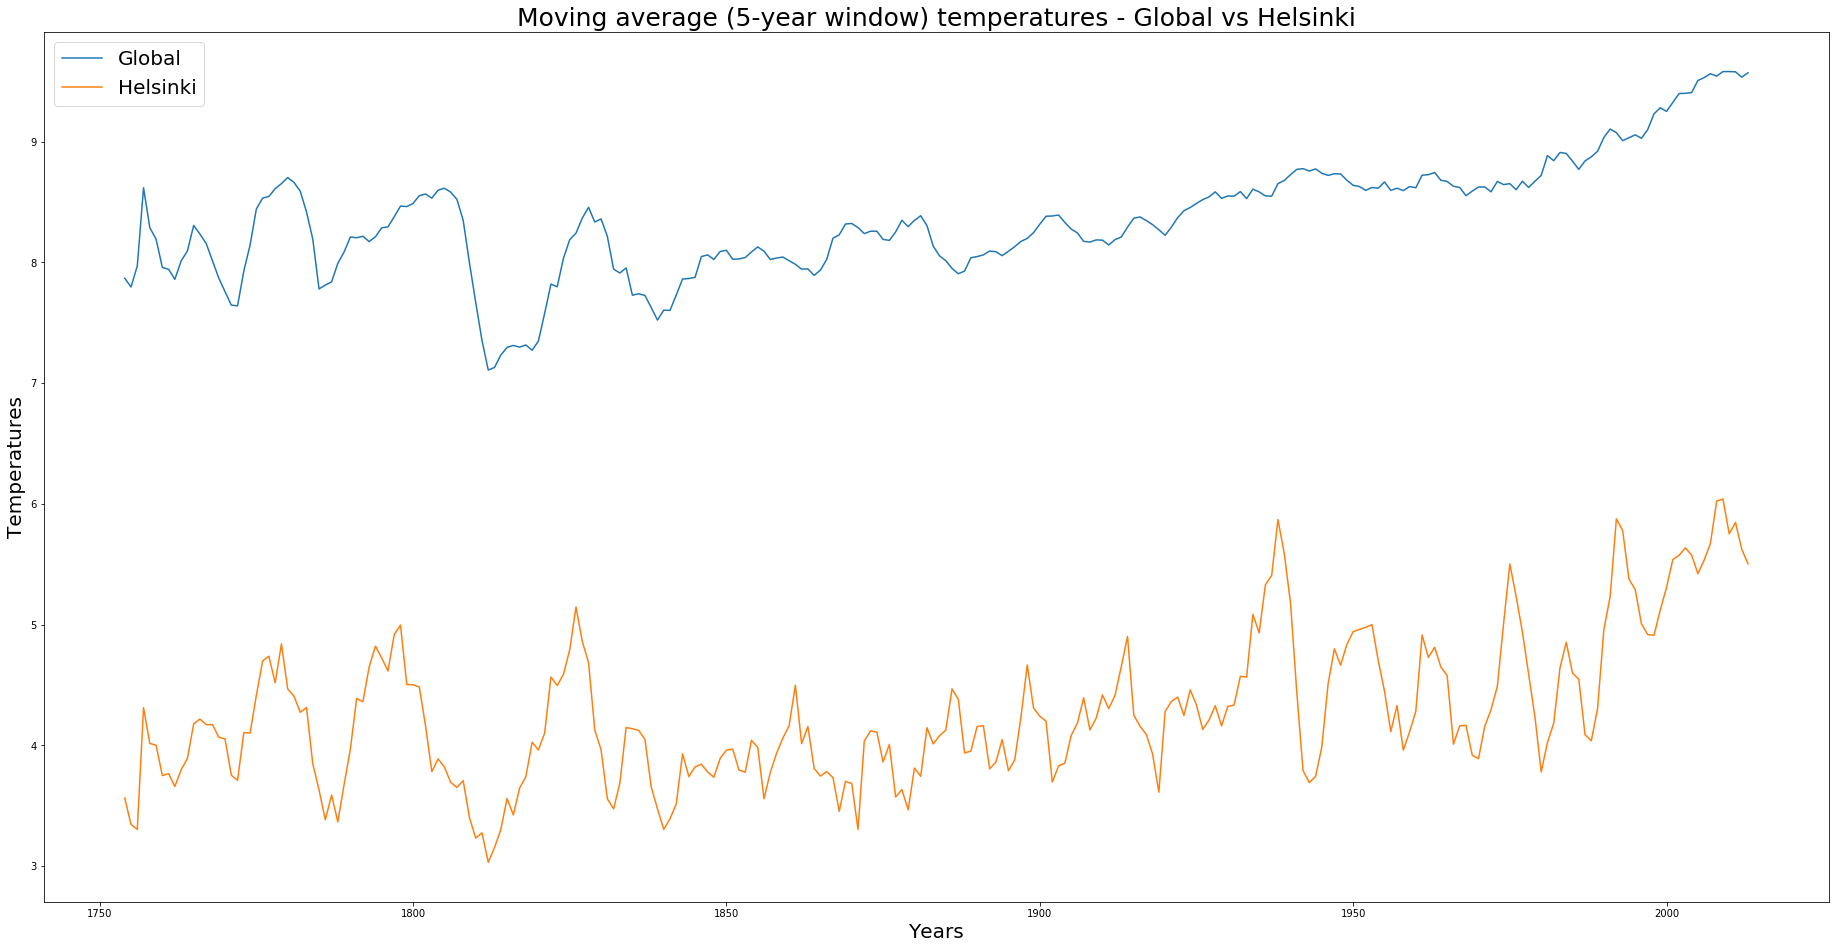

In [26]:
# plotting the graph using moving averages

plt.figure(figsize=(32,16))
plot_globe, = plt.plot(globe.MA_globe)
plot_helsinki, = plt.plot(globe.MA_helsinki)
plt.xlabel('Years',fontsize=20)
plt.ylabel('Temperatures',fontsize=20)
plt.legend([plot_globe,plot_helsinki],['Global','Helsinki'],fontsize=20)
plt.title('Moving average (5-year window) temperatures - Global vs Helsinki',fontsize=25)
plt.show()

In [27]:
# library for higher numerical functions, including correlation coefficient

import numpy as np

In [28]:
# clearing out 'NaN' values created while calculating moving averages

data_globe = globe.MA_globe[globe.MA_globe > 0]
data_helsinki = globe.MA_helsinki[globe.MA_helsinki > 0]

In [29]:
globe.corr() # a simple correlation function for pandas dataframes

,globe,helsinki,MA_globe,MA_helsinki
globe,1.000000,0.546490,0.849099,0.658680
helsinki,0.546490,1.000000,0.423381,0.575644
MA_globe,0.849099,0.423381,1.000000,0.743333
MA_helsinki,0.658680,0.575644,0.743333,1.000000


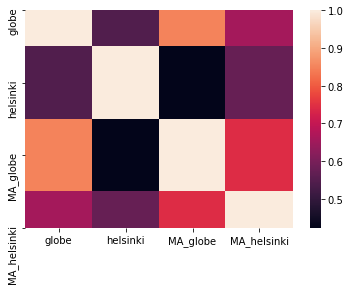

In [30]:
sns.heatmap(globe.corr()) # a heatmap for the correlation function; pay attention to MA_globe-MA_helsinki

In [31]:
# using the numpy function to find the correlation coefficient, which matches what was found above

corr_coef = np.corrcoef(data_globe,data_helsinki)
print(corr_coef)

[[1.         0.74333345]
 [0.74333345 1.        ]]


In [32]:
# adding data for cities Melbourne and Tianjin

melbourne = pd.read_csv("results_melbourne.csv")
tianjin = pd.read_csv("results_tianjin.csv")

In [33]:
melbourne = melbourne.set_index('year')
tianjin = tianjin.set_index('year')

In [34]:
melbourne['MA_melbourne'] = melbourne.avg_temp.rolling(window=5).mean()
tianjin['MA_tianjin'] = tianjin.avg_temp.rolling(window=5).mean()

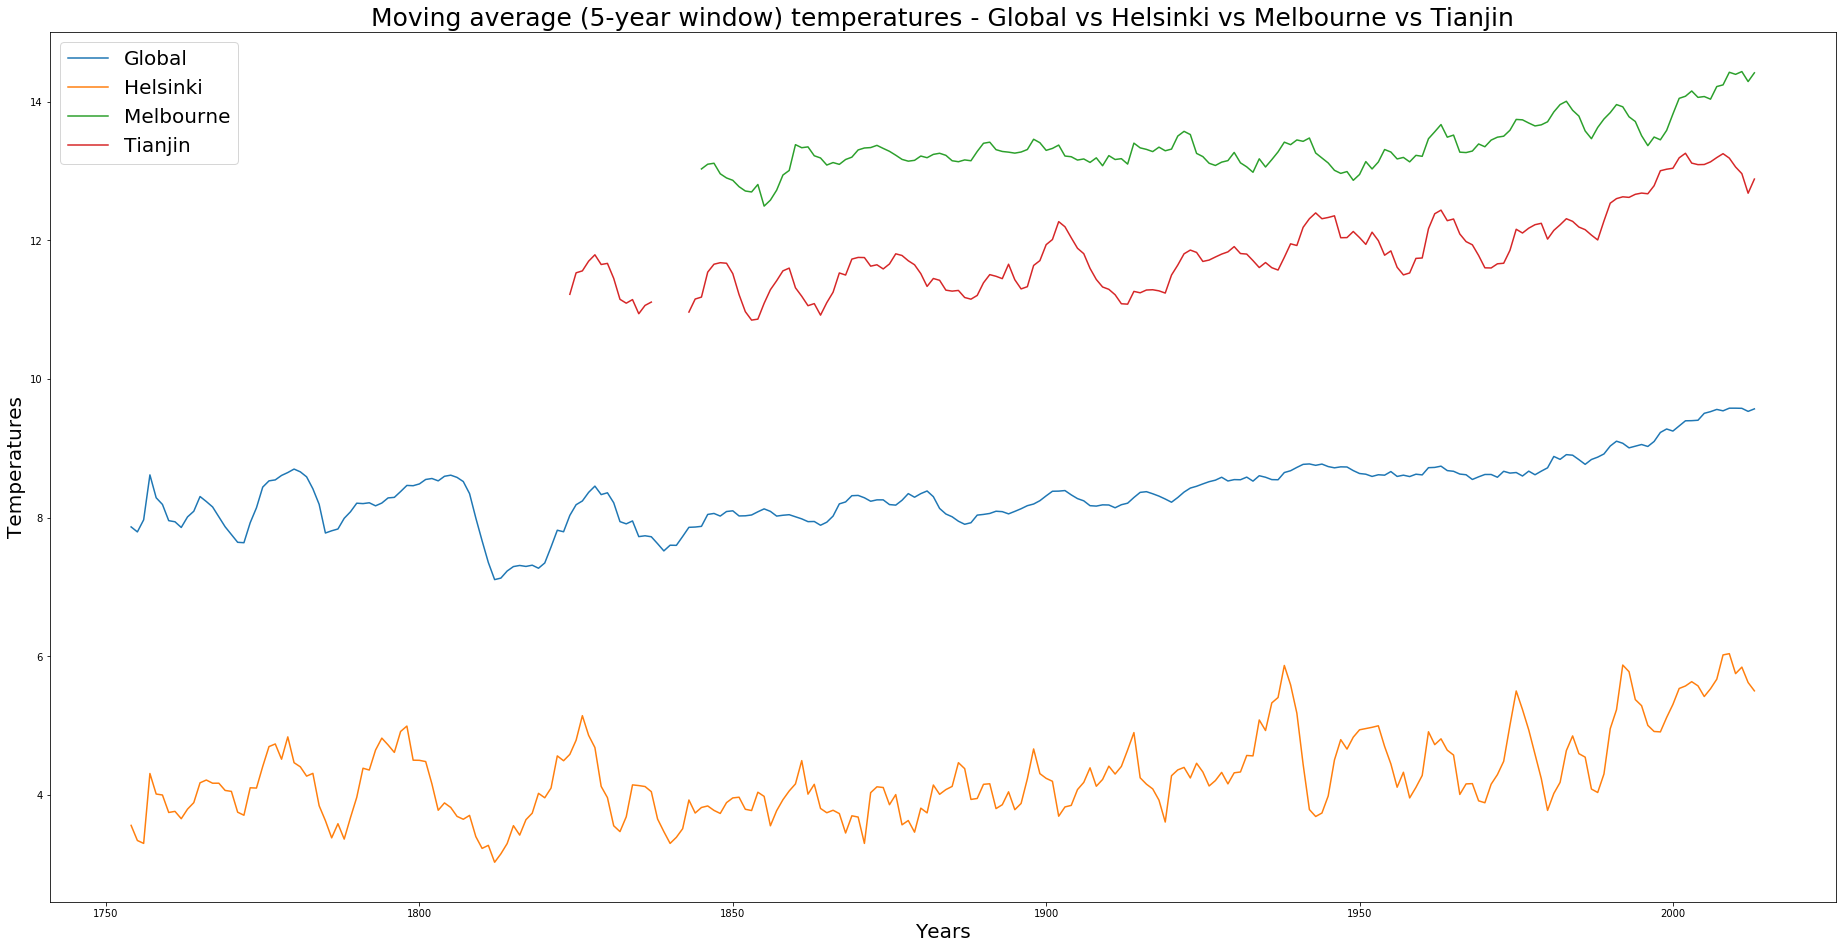

In [35]:
# adding the moving averges of Melbourne and Tianjin to the earlier graph

plt.figure(figsize=(32,16))
plot_globe, = plt.plot(globe.MA_globe)
plot_helsinki, = plt.plot(globe.MA_helsinki)
plot_melbourne, = plt.plot(melbourne.MA_melbourne)
plot_tianjin, = plt.plot(tianjin.MA_tianjin)
plt.xlabel('Years',fontsize=20)
plt.ylabel('Temperatures',fontsize=20)
plt.legend([plot_globe,plot_helsinki,plot_melbourne,plot_tianjin,],
           ['Global','Helsinki','Melbourne','Tianjin'],fontsize=20)
plt.title('Moving average (5-year window) temperatures - Global vs Helsinki vs Melbourne vs Tianjin',fontsize=25)
plt.show()

### Observations from the data

#### 1) The correlation between global temperature and Helsinki temperature seems to be increasing (calculation below).

In [36]:
early = globe.loc[1754:1899]
late = globe.loc[1900:2013]

In [37]:
corr_coef_early = np.corrcoef(early.MA_globe,early.MA_helsinki)
corr_coef_late = np.corrcoef(late.MA_globe,late.MA_helsinki)
print(corr_coef_early)
print(corr_coef_late)

[[1.        0.5100511]
 [0.5100511 1.       ]]
[[1.         0.68895985]
 [0.68895985 1.        ]]


#### 2) Helsinki has seen fluctuating temperatures, with the five highest average temperatures coming since the 1930s

In [38]:
globe.helsinki.sort_values().head()

year
1752   -0.29
1867    1.72
1941    1.96
1862    1.96
1829    2.07
Name: helsinki, dtype: float64

In [39]:
globe.helsinki.sort_values().tail()

year
1938    6.45
1934    6.51
2000    6.57
1989    6.67
2008    6.77
Name: helsinki, dtype: float64

In [40]:
x = city.helsinki.loc[1750:1899].mean()
y = city.helsinki.loc[1900:2013].mean()
print(f"Avg temp in Helsinki till 1899 - {x:.2f} vs Avg temp from 1900 - {y:.2f}")

Avg temp in Helsinki till 1899 - 3.98 vs Avg temp from 1900 - 4.68


#### 3) Rate of change in global temperature has gone up steadily

In [41]:
a = globe.globe.loc[1750:1800].mean()
b = globe.globe.loc[1801:1850].mean()
c = globe.globe.loc[1851:1900].mean()
d = globe.globe.loc[1901:1950].mean()
e = globe.globe.loc[1951:2010].mean()

In [42]:
print(f"Avg temp in Helsinki 1750-1800: {a:.2f}\n vs from 1801-1850: {b:.2f}"
      f"\n vs from 1851-1900: {c:.2f}\n vs from 1901-1951: {d:.2f}"
      f"\n vs from 1951-2010: {e:.2f}")

Avg temp in Helsinki 1750-1800: 8.18
 vs from 1801-1850: 7.88
 vs from 1851-1900: 8.14
 vs from 1901-1951: 8.48
 vs from 1951-2010: 8.93


In [43]:
print(f"Rates of change:\n"
     f"{(b-a)/a*100:.2f}\n"
     f"{(c-b)/b*100:.2f}\n"
     f"{(d-c)/c*100:.2f}\n"
     f"{(e-d)/d*100:.2f}\n")

Rates of change:
-3.73
3.33
4.13
5.39



#### 4) Despite the relatively noticable corerelation between rising global and Helsinki temperature, it's not possible to estimate Helsinki's average temperature based on global average temperature

In [44]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [45]:
X = globe.globe.values.reshape(-1,1)
y = globe.helsinki.values.reshape(-1,1)

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=99)

In [47]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [48]:
y_pred = reg.predict(X_test)

In [49]:
print(f"The prediction score is low at only {reg.score(X_test,y_test)}")

The prediction score is low at only 0.32974295887003713
